In [1]:
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
# from auxiliarFunctions import *
from sklearn.model_selection import train_test_split

/home/operation/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
##take all data
data = pd.concat([
                # pd.read_csv("./VariablesToSave.1.csv",sep=";"),
                # pd.read_csv("./VariablesToSave.2.csv",sep=";"),
                # pd.read_csv("./VariablesToSave.3.csv",sep=";"),
                pd.read_csv("./VariablesToSave.4.csv",sep=";")
                ])
data = data.drop("Name",axis="columns")
data = data.drop("lrSetPointTension",axis="columns")
data = data.drop("lrDeadTimeCompensation",axis="columns")
data = data.drop("lrTotalTorqueAdditive",axis="columns")
data = data.drop("lrAccelerationRead",axis="columns")
data = data.drop("lrVelocityRead",axis="columns")
data = data.drop("lrActDiameter",axis="columns")
data = data.drop("lrSyncVelocity",axis="columns")

# data.to_csv("./data2.csv",encoding='utf-8', index=False)
##separate on takeandtrain data
df = pd.DataFrame(data)
train, test = train_test_split(df, test_size=0.2)
train.to_csv("./trainData.csv",encoding='utf-8', index=False)
test.to_csv("./testData.csv",encoding='utf-8', index=False)

In [3]:
# ##plot correletion
# corr_matrix = df.corr()
# print(corr_matrix["Tension_0"])


Inputs: aMeasuredTension[1],aMeasuredTension[2],lrPIDVelocity
OutPut: lrMeasuredForce

In [4]:
train_data = TabularDataset('./trainData.csv')
test_data = TabularDataset('./testData.csv')
predictor = TabularPredictor(label="lrMeasuredForce",eval_metric="mae", 
                             path=f"../medium_quality-10min")
predictor.fit(train_data,
              presets="medium_quality",
              time_limit=10*60)
test_data_nolab = test_data.drop(columns=["lrMeasuredForce"])
y_test = test_data.get("lrMeasuredForce")
y_pred = predictor.predict(test_data_nolab)
perf = predictor.evaluate_predictions(y_true=y_test, 
                                      y_pred=y_pred, 
                                      auxiliary_metrics=True)
print(str(perf))

Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "../medium_quality-10min/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #97-Ubuntu SMP Mon Oct 2 21:09:21 UTC 2023
Disk Space Avail:   143.62 GB / 166.30 GB (86.4%)
Train Data Rows:    2487720
Train Data Columns: 3
Label Column: lrMeasuredForce
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (176.9418, 0.891, 41.6634, 24.77146)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:  

[1000]	valid_set's l1: 0.404645
[2000]	valid_set's l1: 0.339677
[3000]	valid_set's l1: 0.305443


	Ran out of time, early stopping on iteration 3228. Best iteration is:
	[3228]	valid_set's l1: 0.300038
	-0.3	 = Validation score   (-mean_absolute_error)
	579.99s	 = Training   runtime
	1.3s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the -2.14s of remaining time.
	-0.0582	 = Validation score   (-mean_absolute_error)
	0.46s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 603.17s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("../medium_quality-10min/")
Evaluation: mean_absolute_error on test data: -0.05771101776037084
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_absolute_error": -0.05771101776037084,
    "root_mean_squared_error": -0.21175831243660553,
    "mean_squared_error": -0.04484158288599905,
    "r2": 0.9999270040182

{'mean_absolute_error': -0.05771101776037084, 'root_mean_squared_error': -0.21175831243660553, 'mean_squared_error': -0.04484158288599905, 'r2': 0.9999270040182933, 'pearsonr': 0.9999635034788673, 'median_absolute_error': -0.025127090454100554}


In [9]:
predictor.predict(pd.DataFrame([(0,0,0)],columns=['aMeasuredTension[1]', 'aMeasuredTension[2]', 'lrPIDVelocity']))

0    0.945
Name: lrMeasuredForce, dtype: float32

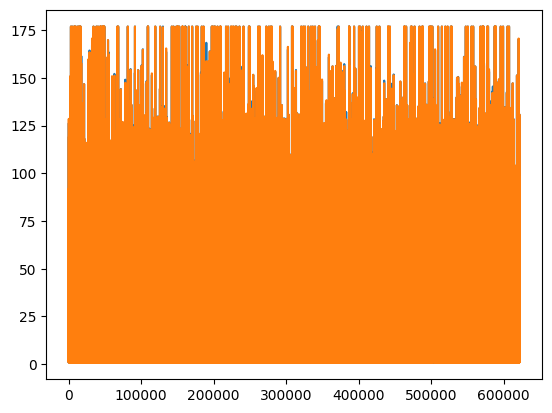

In [5]:
plt.plot(y_test)
plt.plot(y_pred)
plt.show()